## Coronary Heart Disease Risk Prediction Using Logistic Regression.

#### LOGISTIC REGRESSION - HEART DISEASE PREDICTION
Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients 
and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease 
as well as predict the overall risk using logistic regression



#### Source
The dataset is dowlaoded from Kaggle website, and it is from an ongoing cardiovascular study on 
residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. 
It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.


### Problem : The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

### Description of Variables :

In [328]:
import warnings
warnings.filterwarnings('ignore')

### CHANGING THE DIRECTORY :

In [329]:
import os
os.getcwd()

os.chdir(r'C:\Users\shahe\Desktop\DataMining\Project\ClassificationProject')
os.getcwd()

'C:\\Users\\shahe\\Desktop\\DataMining\\Project\\ClassificationProject'

### READING THE DATA :

In [330]:
import pandas as pd

df = pd.read_csv('heartattack.csv')

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### SHAPE OF THE DATA :

In [331]:
## UNDERSTANDING THE DATA

### Checking the Shape of the Data Frame.

print ( f" The Shape of the Data Set: {df.shape} \n")
print ( f" Number of Observations: {df.shape[0]}\n " )
print ( f" Number of Columns: {df.shape[1]}\n " )

 The Shape of the Data Set: (4238, 16) 

 Number of Observations: 4238
 
 Number of Columns: 16
 


### DESCRIPTIVE SUMMARY OF DATA :

In [332]:
#initial data description
df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Checking the Data is Balanced or Imbalanced

In [333]:
df.TenYearCHD.value_counts()  # Imbalanced Data. 0 - no Risk, 1 - there is a Risk.

0    3594
1     644
Name: TenYearCHD, dtype: int64

### Making a Copy of original Data :

In [334]:
df_original = df.copy()

### Checking for Duplicated Data :

In [335]:
df.duplicated().sum()

0

In [336]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Handling Missing Values :

In [337]:
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [338]:
percentage_of_miss()

,Number of Missing,Percentage
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596


 Here I am filling Ordinal and Binary variables with Mode and Continous variables with Median.
Since Median is not effected by Outliers.

In [339]:
df.fillna(
            {
                'education': df.education.mode()[0],
                'cigsPerDay': df.cigsPerDay.mode()[0],
                'BPMeds': df.BPMeds.mode()[0],
                'totChol': df.cigsPerDay.median(),
                'BMI': df.BMI.median(),
                'heartRate': df.heartRate.median(),
                'glucose': df.glucose.median()
                
            }, 
            inplace = True
            )

In [340]:
df.isna().sum() # NO more missing values found.

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [341]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [342]:
df.BPMeds.value_counts()

0.0    4114
1.0     124
Name: BPMeds, dtype: int64

### Changing the 4 levels in 'education' variable to 2 levels, 1 is Basic education ,2 is Advance education.

In [343]:
df.education.value_counts()

1.0    1825
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [344]:
df["education"][df["education"]==1]=1
df["education"][df["education"]==2]=1

df["education"][df["education"]==3]=2
df["education"][df["education"]==4]=2

In [345]:
df.education.value_counts()

1.0    3078
2.0    1160
Name: education, dtype: int64

In [346]:
df.prevalentStroke.value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

### Checking percentage of each level in TARGET Variable ( 'At risk' and 'Not At Risk')

([<matplotlib.patches.Wedge at 0x1c1bac77790>,
 [Text(-1.1546553319363324, 0.5973031595689063, 'Not At risk'),
  Text(0.9770160500999733, -0.5054103657890752, 'At Risk')],
 [Text(-0.7105571273454352, 0.3675711751193269, '84.8%'),
  Text(0.5329178455090763, -0.2756783813394955, '15.2%')])

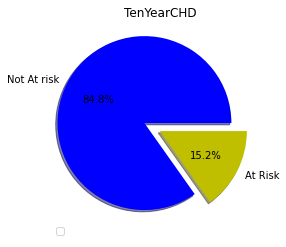

In [347]:
TenYearCHD=df['TenYearCHD'].value_counts()
values = [TenYearCHD[0],TenYearCHD[1]]
colors = ['b', 'y']
labels = ['Not At risk','At Risk']
explode = (0.2, 0)
plt.title('TenYearCHD')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

### Checking the number of Unique values each Feature has :

In [348]:
df.apply(lambda x: len(x.unique()))

male                  2
age                  39
education             2
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

#### Observation : 15 % of the people in Study are at Risk of Getting Coronary Heart Disease. 84.8% are not at Risk

### UNIVARIATE ANALYSIS :

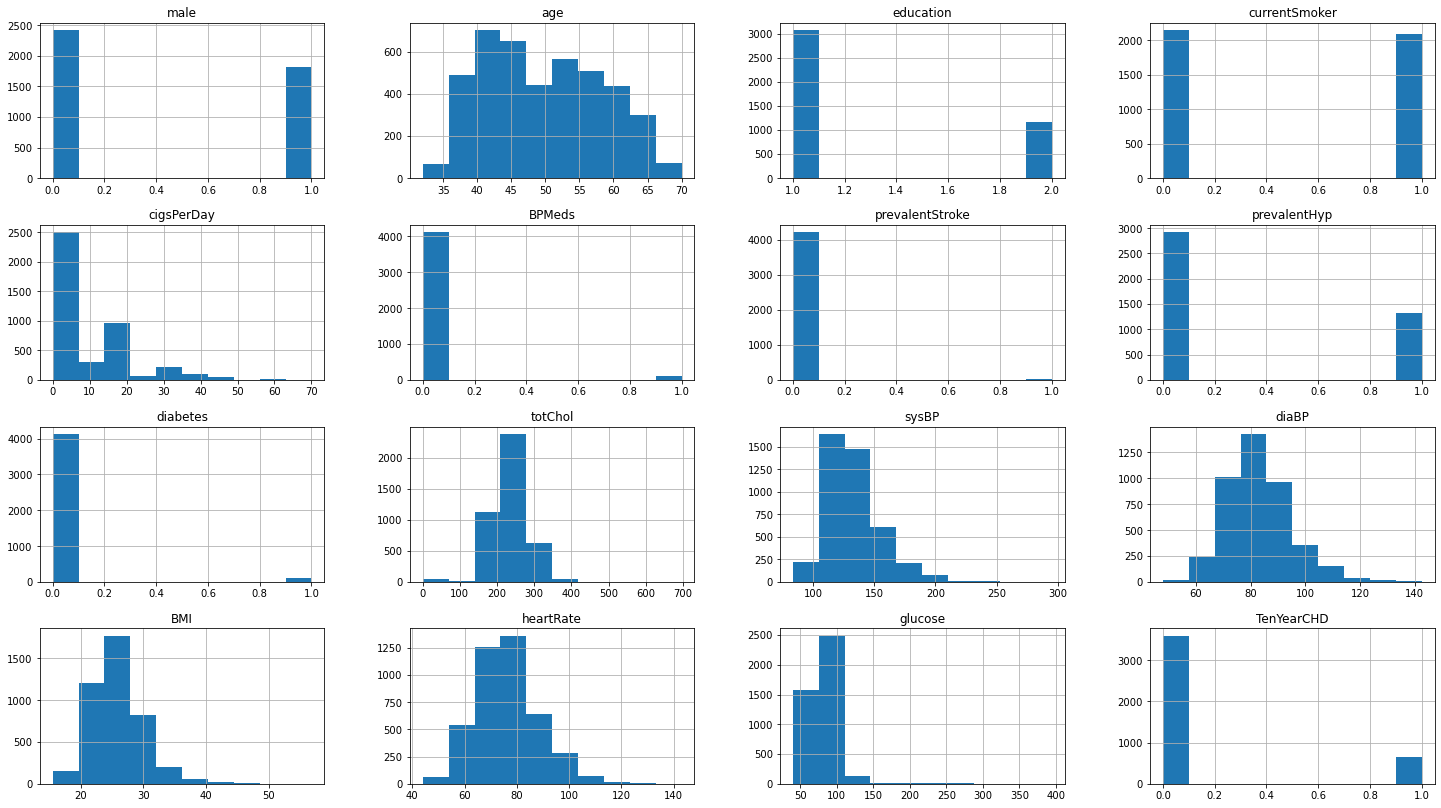

In [349]:
df.hist(figsize=(25,14))
plt.show()

### The histograms in the above graph shows the count or frequency of each value in the variable.
In continous variables it forms a curve showing the Distribution which is normal in age . In totchol,sysBP ,diaBP,BMI,heartrate ,glucose it is skewed.

### BIVARIATE ANALYSIS :

<AxesSubplot:xlabel='male', ylabel='count'>

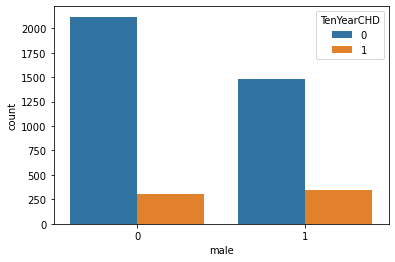

In [350]:
sns.countplot(x=df['male'], hue=df['TenYearCHD']) # Males are at Higher Risk of gettting Coronary Heart Disease.

#### Observation : Males are at Higher Risk of gettting Coronary Heart Disease than Females.

<AxesSubplot:xlabel='diabetes', ylabel='count'>

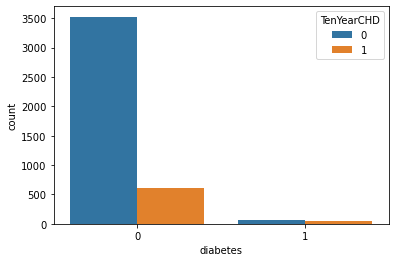

In [351]:
sns.countplot(x='diabetes',data=df,hue='TenYearCHD')

#### Observation : 80 % of People who are diabetic are at risk of getting Coronary Heart Disease.

<AxesSubplot:xlabel='education', ylabel='count'>

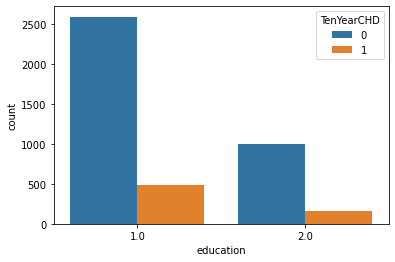

In [352]:
sns.countplot(x='education',data=df,hue='TenYearCHD')

#### Observation : education doesn't have much effect on TenYearCHD

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

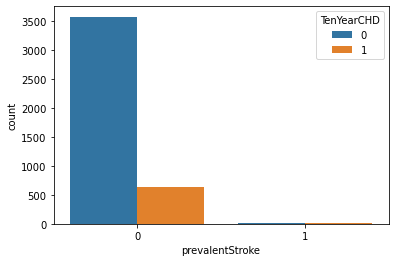

In [353]:
sns.countplot(x='prevalentStroke',data=df,hue='TenYearCHD')

#### Observation : Almost 90% people with prevalentStroke are at Risk of TenTearCHD.(CoronaryHeartDisease)

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

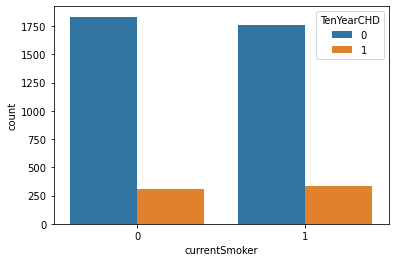

In [354]:
sns.countplot(x='currentSmoker',data=df,hue='TenYearCHD')

#### Observation : about 30% current Smokers have risk of getting TenYearCHD(Coronary Heart Disease)

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

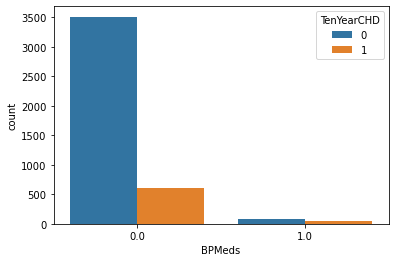

In [355]:
sns.countplot(x='BPMeds',data=df,hue='TenYearCHD')

#### Observation : 70% - 80% people who are taking BPMeds are at Risk TenYearCHD(Coronary Heart Disease)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

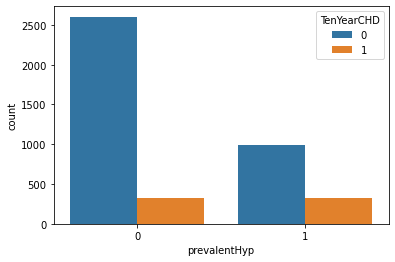

In [356]:
sns.countplot(x='prevalentHyp',data=df,hue='TenYearCHD')

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

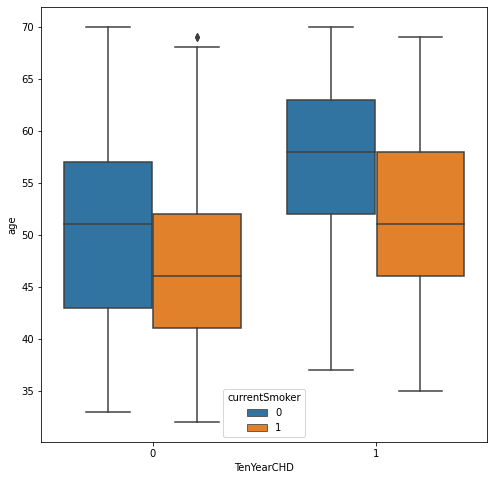

In [357]:
plt.figure(figsize=(8,8))
sns.boxplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker')

#### Observation : about 40% of people prevalentHyp are at Risk TenYearCHD(Coronary Heart Disease)

### Corerelation Analysis for Nominal Data : ChiSquare Test. 
    
    Larger the Chisquare value , more likely the variables are related.

In [358]:
from scipy.stats import chi2_contingency

def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at significance level 0.05")
    else:
        print("\nThere is no correlation between the two variables")

In [359]:
chi_square("education",'TenYearCHD')

[[2610.27182633  467.72817367]
 [ 983.72817367  176.27182633]]

Chi-square is : 2.909085 

p_value is : 0.088082 

degree of freedom is : 1

There is no correlation between the two variables


In [360]:
chi_square("diabetes",'TenYearCHD')

[[3501.56347334  627.43652666]
 [  92.43652666   16.56347334]]

Chi-square is : 38.441723 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


In [361]:
chi_square("male",'TenYearCHD')

[[2051.41245871  367.58754129]
 [1542.58754129  276.41245871]]

Chi-square is : 32.642960 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


In [362]:
chi_square("currentSmoker",'TenYearCHD')

[[1818.20103823  325.79896177]
 [1775.79896177  318.20103823]]

Chi-square is : 1.497706 

p_value is : 0.221025 

degree of freedom is : 1

There is no correlation between the two variables


In [363]:
chi_square("BPMeds",'TenYearCHD')

[[3488.8428504  625.1571496]
 [ 105.1571496   18.8428504]]

Chi-square is : 30.236780 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


In [364]:
chi_square("prevalentStroke",'TenYearCHD')

[[3572.79896177  640.20103823]
 [  21.20103823    3.79896177]]

Chi-square is : 14.020763 

p_value is : 0.000181 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


In [365]:
chi_square("prevalentHyp",'TenYearCHD')

[[2477.97734781  444.02265219]
 [1116.02265219  199.97734781]]

Chi-square is : 132.610997 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


### Checking the correlation of Continous variables.

In [366]:
dfcont=df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

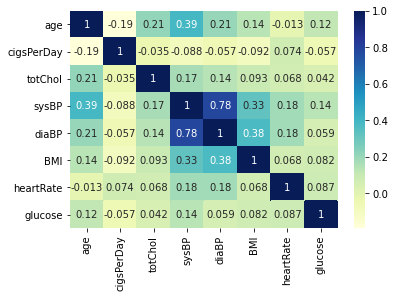

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns


dfcont = sns.heatmap(dfcont.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
sysBP and diaBP show strong positive correlation, that means if one increases the other also increases.
sysBP and age show positive corelation
BMI and sysBP,diaBP show positive correltion

And , there are also some strong negative corelations.

### Splitting the data to Independent variables (X) and Dependent variables (y)

In [368]:
X=df.drop('TenYearCHD',axis=1)
y=df.TenYearCHD

### Descriptive Summary of the Independent variables.

In [369]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.0000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0
education,4238.0,1.273714,0.445917,1.00,1.00,1.0,2.0000,2.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.0000,1.0
cigsPerDay,4238.0,8.941482,11.902399,0.00,0.00,0.0,20.0000,70.0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.0000,1.0
totChol,4238.0,233.928740,51.169478,0.00,205.00,233.0,262.0000,696.0


### Feature Selection :

### Now, using Logit function and checking the p-values of the Features.

In [370]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.397544
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4223
Method:                           MLE   Df Model:                           14
Date:                Tue, 04 May 2021   Pseudo R-squ.:                 0.06700
Time:                        15:37:48   Log-Likelihood:                -1684.8
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.313e-43
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.3834      0.097      3.969      0.000       0.194       0.573
age           

### Logit functions gives the clear picture of co-effients and the p-values.
'currentSmoker','BPMeds','totChol','glucose' have p-values greater than 0.05.
so, we need to drop them.

### Dropping the columns with high p-values :

In [371]:
X = df.drop(['currentSmoker','BPMeds','totChol','glucose'],axis=1)

### Splitting the 'X' and 'y' data into Train and test (75 % Train and 25% Test)

In [372]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)
X_test.head()

,male,age,education,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,BMI,heartRate,TenYearCHD
1669,0,47,1.0,0.0,0,1,0,128.0,92.5,27.64,75.0,0
156,0,58,1.0,0.0,0,1,0,153.0,80.5,23.36,60.0,0
87,0,61,1.0,1.0,0,1,0,200.0,104.0,38.46,57.0,0
685,0,45,1.0,0.0,0,1,0,152.5,82.0,25.92,100.0,0
666,0,57,1.0,0.0,0,0,0,136.0,92.0,26.24,65.0,0


In [373]:
y_test.head()

1669    0
156     0
87      0
685     0
666     0
Name: TenYearCHD, dtype: int64

### Feature Scaling : Scaling only Xtrain and Xtest using Standard Scaler.

In [374]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#scale the features using training set

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc.transform(X_test))

### Standardscaler uses z-scores and standardise the data which also takes outliers in to account.

### MODELLING :

In [375]:
df.TenYearCHD.value_counts() # 0 means  no risk, 1 means at risk

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [376]:
#importing the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={0:1, 1:5})

### Since the Data is imbalanced, I am balancing the data by using 'class_weight'

In [377]:
#Training the model 
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={0: 1, 1: 5})

### Checking the Trained Model Score for the Test data.

In [378]:
#Validating the model

model.score(X_test_scaled,y_test)

1.0

### k- fold Cross Validation by Logistic Regression

In [379]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_train_scaled,y_train,cv=5).mean()

1.0

### Classification Report & Confusion Matrix :

In [380]:
from sklearn.metrics import confusion_matrix, classification_report

In [381]:
#Let's look at some other scores as well


y_pred = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       890
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1060
   macro avg       1.00      1.00      1.00      1060
weighted avg       1.00      1.00      1.00      1060



array([[890,   0],
       [  0, 170]], dtype=int64)

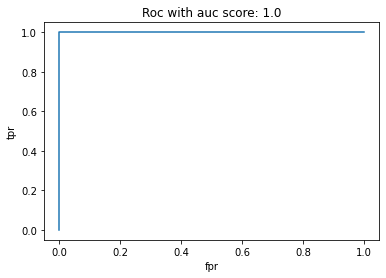

In [382]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
#taking the second column for correct auc score
y_pred_prob = model.predict_proba(X_test_scaled)[:,1] 

#second column represents the 'o' class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

#plot the curve with auc score
import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()